In [32]:
import numpy as np
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
import math
import array
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

In [33]:
#load data from file
train = np.loadtxt('training.txt')
validate = np.loadtxt('validate.txt')
x_t = np.arange(0,3,0.001)
x_v = np.arange(0,3,0.003)
N = train.shape[0]
Nv = validate.shape[0]
#plt.subplot(121)
#plt.plot(x_t,train,'r')
#plt.axis('scaled')
#plt.subplot(122)
#plt.plot(x_v,validate,'r')
#plt.axis('scaled')

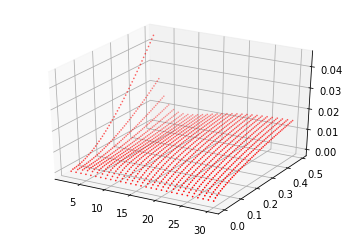

In [34]:
#function to return the EMR of this method
# training data adn validation
lamd = np.arange(0,0.5,0.01)
MSE_v = np.zeros(shape=(50,32))
x = []
y = []
z = []
for m in range(2,31):
    for l in range(50):
        X = np.zeros(shape=(m,N-m))
        Y = train[m:N]
        for i in range(0,N-m):
            temp = train[i:i+m]
            X[:,i] = temp[::-1]
        r = (X@X.T)/(N-m)
        R = r+lamd[l]*np.identity(m)
        P = (X@Y)/(N-m)
        W = np.linalg.inv(R)@P
        Xv = np.zeros(shape=(m,Nv-m))
        Yv = validate[m:Nv]
        for j in range(0,Nv-m):
            temp = validate[j:j+m]
            Xv[:,j] = temp[::-1]
        yv = W.T@Xv
        MSE = np.zeros(shape=(Nv-m,1))
        for n in range(0,Nv-m):
            MSE[n] = (Yv[n] - yv[n])**2
        MSE_v[l,m] = MSE.sum()/(Nv-m)
        x.append(m)
        y.append(lamd[l])
        z.append(MSE.sum()/(Nv-m))
ax = plt.subplot(111,projection='3d')
ax.scatter(x,y,z,c='r',s=0.5)
plt.show()

[[ 2552.90407948  2552.17332119  2550.70403168  2548.51040502
   2545.61469018  2542.04645912  2537.84164411  2533.04141988
   2527.69101041  2521.8384906   2515.53363778  2508.8268736   2501.76832375
   2494.40701129  2486.79018853  2478.96280429  2470.96709777  2462.8423074
   2454.62448189  2446.34638129  2438.0374564   2429.72389643
   2421.42873549  2413.17200973  2404.97095696  2396.84025034
   2388.79225699  2380.83731139  2372.98399305  2365.23939839]
 [ 2552.17332119  2552.17124424  2551.42612946  2549.94394578
   2547.73917079  2544.83432866  2541.25923822  2537.05002876
   2532.24800278  2526.89842981  2521.04934433  2514.75040362
   2508.05184382  2501.00355764  2493.654305    2486.0510584   2478.23847827
   2470.25851009  2462.15009302  2453.94896936  2445.68758483
   2437.39506968  2429.09729187  2420.81697338  2412.57386104
   2404.38494246  2396.26469639  2388.2253663   2380.27724487
   2372.42895806]
 [ 2550.70403168  2551.42612946  2551.40949329  2550.65132169  2549.1